- Remove non alphanumeric characters for simple training

In [1]:
print("hello")

hello


In [3]:
from transformer import Transformer 
import torch
import numpy as np

In [4]:
english_file = 'D:/SEM - 3/Project/Translation/IITB.en-hi.en' 
hindi_file = 'D:/SEM - 3/Project/Translation/IITB.en-hi.hi' 


START_TOKEN = '<ST>'
PADDING_TOKEN = '<PT>'
END_TOKEN = '<ET>'


hindi_vocabulary = [START_TOKEN, " ", "!", '"', '#', '$', ';', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', '?', 'ˌ',
                    'ँ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ॠ', 'ऌ', 'ऎ', 'ए', 'ऐ', 'ऒ', 'ओ', 'औ',
                    'क', 'ख', 'ग', 'घ', 'ङ',
                    'च', 'छ', 'ज', 'झ', 'ञ',
                    'ट', 'ठ', 'ड', 'ढ', 'ण',
                    'त', 'थ', 'द', 'ध', 'न',
                    'प', 'फ', 'ब', 'भ', 'म',
                    'य', 'र', 'ऱ', 'ल', 'ळ', 'व', 'श', 'ष', 'स', 'ह',
                    '़', 'ऽ', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'ॄ', 'ॆ', 'े', 'ै', 'ॊ', 'ो', 'ौ', '्', 'ॕ', 'ॖ', 'फ़', 'ॣ', 'ं', 'ः',
                    '०', '१', '२', '३', '४', '५', '६', '७', '८', '९', PADDING_TOKEN, END_TOKEN]

english_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '_', '(', ')', '*', '+', ',', '-', '.', '/',
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '@',
                        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                        'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                        'Y', 'Z',
                        "[", '\' , "]" , "^", "_"', "`",
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                        'y', 'z',
                        '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]

In [5]:
index_to_hindi = {k:v for k,v in enumerate(hindi_vocabulary)}
hindi_to_index = {v:k for k,v in enumerate(hindi_vocabulary)}
index_to_english = {k:v for k,v in enumerate(english_vocabulary)}
english_to_index = {v:k for k,v in enumerate(english_vocabulary)}

In [6]:
with open(english_file, 'r' , encoding = 'utf8') as file:
    english_sentences = file.readlines()
with open(hindi_file, 'r' ,  encoding = 'utf8') as file:
    hindi_sentences = file.readlines()
english_sentences = [sentence.rstrip('\n').lower() for sentence in english_sentences]
hindi_sentences = [sentence.rstrip('\n') for sentence in hindi_sentences]

In [7]:
english_sentences[:10]

['give your application an accessibility workout',
 'accerciser accessibility explorer',
 'the default plugin layout for the bottom panel',
 'the default plugin layout for the top panel',
 'a list of plugins that are disabled by default',
 'highlight duration',
 'the duration of the highlight box when selecting accessible nodes',
 'highlight border color',
 'the color and opacity of the highlight border.',
 'highlight fill color']

In [8]:
hindi_sentences[:10]

['अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें',
 'एक्सेर्साइसर पहुंचनीयता अन्वेषक',
 'निचले पटल के लिए डिफोल्ट प्लग-इन खाका',
 'ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका',
 'उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है',
 'अवधि को हाइलाइट रकें',
 'पहुंचनीय आसंधि (नोड) को चुनते समय हाइलाइट बक्से की अवधि',
 'सीमांत (बोर्डर) के रंग को हाइलाइट करें',
 'हाइलाइट किए गए सीमांत का रंग और अपारदर्शिता। ',
 'भराई के रंग को हाइलाइट करें']

In [18]:
import numpy as np
PERCENTILE = 97
print( f"{PERCENTILE}th percentile length hindi: {np.percentile([len(x)max for x in hindi_sentences], PERCENTILE)}" )
print( f"{PERCENTILE}th percentile length English: {np.percentile([len(x) for x in english_sentences], PERCENTILE)}" )


1659083
97th percentile length English: 271.0


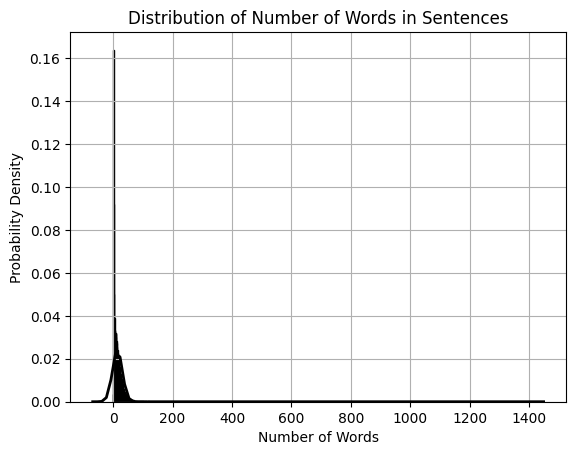

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import norm

word_counts = [len(sentence.split()) for sentence in hindi_sentences]

plt.hist(word_counts, bins=range(min(word_counts), max(word_counts) + 1), density=True, edgecolor='black')

# Fitting a normal distribution
mu, std = norm.fit(word_counts)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Distribution of Number of Words in Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

In [9]:
max_sequence_length = 200

def is_valid_tokens(sentence, vocab):
    for token in list(set(sentence)):
        if token not in vocab:
            return False
    return True

def is_valid_length(sentence, max_sequence_length):
    return len(list(sentence)) < (max_sequence_length - 1) # need to re-add the end token so leaving 1 space

valid_sentence_indicies = []
for index in range(len(hindi_sentences)):
    hindi_sentence, english_sentence = hindi_sentences[index], english_sentences[index]
    if is_valid_length(hindi_sentence, max_sequence_length) and is_valid_length(english_sentence, max_sequence_length) and is_valid_tokens(hindi_sentence, hindi_vocabulary) and is_valid_tokens(english_sentence, english_vocabulary):
        valid_sentence_indicies.append(index)

print(f"Number of sentences: {len(hindi_sentences)}")
print(f"Number of valid sentences: {len(valid_sentence_indicies)}")

Number of sentences: 1659083
Number of valid sentences: 619944


In [10]:
hindi_sentences = [hindi_sentences[i] for i in valid_sentence_indicies]
english_sentences = [english_sentences[i] for i in valid_sentence_indicies]

In [11]:
hindi_sentences[:3]

['निचले पटल के लिए डिफोल्ट प्लग-इन खाका',
 'ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका',
 'उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है']

In [12]:
import torch

d_model = 512
batch_size = 30
ffn_hidden = 2048
num_heads = 8
drop_prob = 0.1
num_layers = 4
max_sequence_length = 200
hi_vocab_size = len(hindi_vocabulary)

transformer = Transformer(d_model,
                          ffn_hidden,
                          num_heads,
                          drop_prob,
                          num_layers,
                          max_sequence_length,
                          hi_vocab_size,
                          english_to_index,
                          hindi_to_index,
                          START_TOKEN,
                          END_TOKEN,
                          PADDING_TOKEN)

In [13]:
transformer

Transformer(
  (encoder): Encoder(
    (sentence_embedding): SentenceEmbedding(
      (embedding): Embedding(95, 512)
      (position_encoder): PositionalEncoding()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): SequentialEncoder(
      (0): EncoderLayer(
        (attention): MultiHeadAttention(
          (qkv_layer): Linear(in_features=512, out_features=1536, bias=True)
          (linear_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNormalization()
        (dropout1): Dropout(p=0.1, inplace=False)
        (ffn): PositionwiseFeedForward(
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (linear2): Linear(in_features=2048, out_features=512, bias=True)
          (relu): ReLU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (norm2): LayerNormalization()
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderLayer(
        (attention): MultiHeadAt

In [14]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):

    def __init__(self, english_sentences, hindi_sentences):
        self.english_sentences = english_sentences
        self.hindi_sentences = hindi_sentences

    def __len__(self):
        return len(self.english_sentences)

    def __getitem__(self, idx):
        return self.english_sentences[idx], self.hindi_sentences[idx]

In [15]:
dataset = TextDataset(english_sentences, hindi_sentences)

In [16]:
len(dataset)

619944

In [17]:
dataset[1]

('the default plugin layout for the top panel',
 'ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका')

In [18]:
train_loader = DataLoader(dataset, batch_size)
iterator = iter(train_loader)

In [19]:
for batch_num, batch in enumerate(iterator):
    print(batch)
    if batch_num > 3:
        break

[('the default plugin layout for the bottom panel', 'the default plugin layout for the top panel', 'a list of plugins that are disabled by default', 'highlight border color', 'highlight fill color', 'api browser', 'browse the various methods of the current accessible', 'hide private attributes', 'method', 'property', 'value', 'ipython console', 'event monitor', 'everything', 'selected accessible', 'source', 'event monitor', 'shows events as they occur from selected types and sources', 'start / stop event recording', 'clear event log', '(no description)', 'description', 'show', '_ accessible', 'perform action', 'id', 'toolkit', 'version', 'col _ lection', '0, 0'), ('निचले पटल के लिए डिफोल्ट प्लग-इन खाका', 'ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका', 'उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है', 'सीमांत (बोर्डर) के रंग को हाइलाइट करें', 'भराई के रंग को हाइलाइट करें', 'एपीआई विचरक', 'इस समय जिसे प्राप्त किया गया हो, उसकी विभिन्न विधियों (मेथड) में विचरण करें', 'निजी गुणो

In [20]:
from torch import nn

criterian = nn.CrossEntropyLoss(ignore_index=hindi_to_index[PADDING_TOKEN],
                                reduction='none')

# When computing the loss, we are ignoring cases when the label is the padding token
for params in transformer.parameters():
    if params.dim() > 1:
        nn.init.xavier_uniform_(params)

optim = torch.optim.Adam(transformer.parameters(), lr=1e-4)
device = torch.device('cuda') #if torch.cuda.is_available() else torch.device('cpu')

In [21]:
NEG_INFTY = -1e9

def create_masks(eng_batch, hi_batch):
    num_sentences = len(eng_batch)
    look_ahead_mask = torch.full([max_sequence_length, max_sequence_length] , True)
    look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)
    encoder_padding_mask = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_self_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_cross_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)

    for idx in range(num_sentences):
      eng_sentence_length, hi_sentence_length = len(eng_batch[idx]), len(hi_batch[idx])
      eng_chars_to_padding_mask = np.arange(eng_sentence_length + 1, max_sequence_length)
      hi_chars_to_padding_mask = np.arange(hi_sentence_length + 1, max_sequence_length)
      encoder_padding_mask[idx, :, eng_chars_to_padding_mask] = True
      encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True
      decoder_padding_mask_self_attention[idx, :, hi_chars_to_padding_mask] = True
      decoder_padding_mask_self_attention[idx, hi_chars_to_padding_mask, :] = True
      decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
      decoder_padding_mask_cross_attention[idx, hi_chars_to_padding_mask, :] = True

    encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0)
    decoder_self_attention_mask =  torch.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
    decoder_cross_attention_mask = torch.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
    return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

Modify mask such that the padding tokens cannot look ahead.
In Encoder, tokens before it should be -1e9 while tokens after it should be -inf.


Note the target mask starts with 2 rows of non masked items: https://github.com/SamLynnEvans/Transformer/blob/master/Beam.py#L55


In [ ]:
transformer.train()
transformer.to(device)
total_loss = 0
num_epochs = 10

for epoch in range(num_epochs):
    print(f"Epoch {epoch}")
    iterator = iter(train_loader)
    for batch_num, batch in enumerate(iterator):
        transformer.train()
        eng_batch, hi_batch = batch
        encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks(eng_batch, hi_batch)
        optim.zero_grad()
        hi_predictions = transformer(eng_batch,
                                     hi_batch,
                                     encoder_self_attention_mask.to(device),
                                     decoder_self_attention_mask.to(device),
                                     decoder_cross_attention_mask.to(device),
                                     enc_start_token=False,
                                     enc_end_token=False,
                                     dec_start_token=True,
                                     dec_end_token=True)
        labels = transformer.decoder.sentence_embedding.batch_tokenize(hi_batch, start_token=False, end_token=True)
        loss = criterian(
            hi_predictions.view(-1, hi_vocab_size).to(device),
            labels.view(-1).to(device)
        ).to(device)
        valid_indicies = torch.where(labels.view(-1) == hindi_to_index[PADDING_TOKEN], False, True)
        loss = loss.sum() / valid_indicies.sum()
        loss.backward()
        optim.step()

        
        #Validation
        if batch_num % 100 == 0:
            print(f"Iteration {batch_num} : {loss.item()}")
            print(f"English: {eng_batch[0]}")
            print(f"hindi Translation: {hi_batch[0]}")
            hi_sentence_predicted = torch.argmax(hi_predictions[0], axis=1)
            predicted_sentence = ""
            for idx in hi_sentence_predicted:
              if idx == hindi_to_index[END_TOKEN]:
                break
              predicted_sentence += index_to_hindi[idx.item()]
            print(f"hindi Prediction: {predicted_sentence}")


            transformer.eval()
            hi_sentence = ("",)
            eng_sentence = ("should we go to the mall?",)
            for word_counter in range(max_sequence_length):
                encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask= create_masks(eng_sentence, hi_sentence)
                predictions = transformer(eng_sentence,
                                          hi_sentence,
                                          encoder_self_attention_mask.to(device),
                                          decoder_self_attention_mask.to(device),
                                          decoder_cross_attention_mask.to(device),
                                          enc_start_token=False,
                                          enc_end_token=False,
                                          dec_start_token=True,
                                          dec_end_token=False)
                next_token_prob_distribution = predictions[0][word_counter] # not actual probs
                next_token_index = torch.argmax(next_token_prob_distribution).item()
                next_token = index_to_hindi[next_token_index]
                hi_sentence = (hi_sentence[0] + next_token, )
                if next_token == END_TOKEN:
                  break

            print(f"Evaluation translation (should we go to the mall?) : {hi_sentence}")
            print("-------------------------------------------")

    model_filename = f"D:/SEM - 3/Project/Translation/model{epoch}.pt"
    torch.save({
            'epoch': epoch,
            'model_state_dict': transformer.state_dict(),
            'optimizer_state_dict': optim.state_dict()
            }, model_filename)


Epoch 0
Iteration 0 : 5.364475727081299
English: the default plugin layout for the bottom panel
hindi Translation: निचले पटल के लिए डिफोल्ट प्लग-इन खाका
hindi Prediction: (४४४(४४(४४४४४४४४४ह४४४(४(४४((४४(४(४४*(आ(((े((ट४े(((((फ़ट((("ट(टट(ट(ट(((४४((((((४(टट(((((((४टब((((((४फ़ट४((फ़४फ़४ट7(४(४४(४ट४(४((ट(फ़(((((४((((व((४"((औ((((१((ू(४((४(((((ऱ(१((((औव(४(आ((&ट*(((४(४ट((१४(ट(ट(((४४ट
Evaluation translation (should we go to the mall?) : ('                                                                                                                                                                                                        ',)
-------------------------------------------
Iteration 100 : 3.443962574005127
English: move ~ a onto the three of diamonds.
hindi Translation: ईंट की तिक्की
hindi Prediction:     काक क  कककका क      ा    ा क  क    क    क कक    क क ाा  ा ा   कक कक  कककक   क  कक कक क क क क क  कक  ककक    कक   क   क    ाक क  ाक ा ा क  क      क ा कााककक कक      क   क         क   कका  क क 

## Inference

In [ ]:
transformer.eval()
def translate(eng_sentence):
  eng_sentence = (eng_sentence,)
  hi_sentence = ("",)
  for word_counter in range(max_sequence_length):
    encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask= create_masks(eng_sentence, hi_sentence)
    predictions = transformer(eng_sentence,
                              hi_sentence,
                              encoder_self_attention_mask.to(device),
                              decoder_self_attention_mask.to(device),
                              decoder_cross_attention_mask.to(device),
                              enc_start_token=False,
                              enc_end_token=False,
                              dec_start_token=True,
                              dec_end_token=False)
    next_token_prob_distribution = predictions[0][word_counter]
    next_token_index = torch.argmax(next_token_prob_distribution).item()
    next_token = index_to_hindi[next_token_index]
    hi_sentence = (hi_sentence[0] + next_token, )
    if next_token == END_TOKEN:
      break
  return hi_sentence[0]

In [ ]:
translation = translate("what should we do when the day starts?")
print(translation)


In [ ]:
translation = translate("how is this the truth?")
print(translation)


In [ ]:
translation = translate("the world is a large place with different people")
print(translation)


In [ ]:
translation = translate("my name is ajay")
print(translation)


In [ ]:
translation = translate("i cannot stand this smell")
print(translation)


In [ ]:
translation = translate("noodles are the best")
print(translation)

In [ ]:
translation = translate("why care about this?")
print(translation)

In [ ]:
translation = translate("this is the best thing ever")
print(translation)


In [ ]:
translation = translate("i am here")
print(translation)


In [ ]:
translation = translate("click this")
print(translation)


In [ ]:
translation = translate("where is the mall?")
print(translation)

In [ ]:
translation = translate("what should we do?")
print(translation)

This is correct; but it absolutely fumbles on the next one

In [ ]:
translation = translate("today, what should we do")
print(translation)

In [ ]:
translation = translate("why did they activate?")
print(translation)
# ಅವರು ಏಕೆ ಸಕ್ರಿಯಗೊಳಿಸಿದರು?

In [ ]:
translation = translate("why did they do this?")
print(translation)
# ಅವರು ಇದನ್ನು ಏಕೆ ಮಾಡಿದರು?

That turned out well!

In [ ]:
translation = translate("i am well.")
print(translation)
# ನಾನು ಆರಾಮವಾಗಿದ್ದೇನೆ

Translation: "I will give you something"

In [ ]:
translation = translate("whats the word on the street?")
print(translation)

Kind of close semantically. Translation is something like: "What is this about"

## Insights

- When training, we can treat every alphabet as a single unit instead of splitting it into it's corresponding parts to preserve meaning. For example, ಮಾ should be 1 unit when comuting a loss. It should not be decomposed into ಮ + ఆ
- Using word-based or BPE based tokenizations may help mitigate (1). Also, we will get valid word (or BPE) units if we do so.
- Make sure the training set has a large variety of sentences that are not just about one topic like "work" and "government"
- Increase the number of encoder / decoder units for better translations. It was set to the minimum of 1 of each unit here.
- Create a translator with a language you understand ideally.

Overall, this model definately learned something. And you can use other languages instead of this hindi language and might see better luck